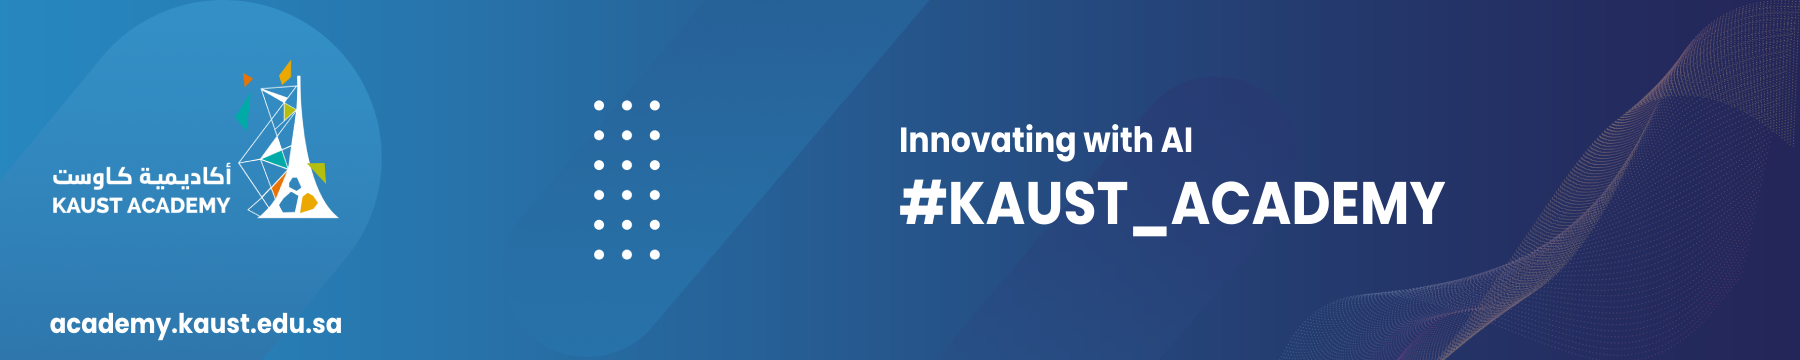

# CarRacing-v3

## Observation Space
- A 96×96 RGB image (uint8) representing a top-down view of the car, the track, and dashboard indicators.

## Action Space
- **Continuous (default)**: A 3D vector with values:
  - `action[0]`: Steering ∈ [-1.0, 1.0] (left to right)
  - `action[1]`: Gas ∈ [0.0, 1.0]
  - `action[2]`: Brake ∈ [0.0, 1.0]

- **Optional discrete** version (5 actions):
  - 0: No-op
  - 1: Steer right
  - 2: Steer left
  - 3: Gas
  - 4: Brake

## Reward Function
- A reward of **+1000 / N** for every new track tile visited, where N is the total number of tiles.
- A penalty of **-0.1** is applied every frame to encourage faster driving.
- Going outside the playfield results in a **-100** penalty and ends the episode.

Example: If the car finishes the track in 732 frames, the total reward = 1000 - (0.1 × 732) = 926.8

## Starting State
- The car starts stationary at the center of the road.

## Episode Termination
- The episode ends when:
  - The car has visited 95% (or more) of the track (`lap_complete_percent=0.95`), or
  - The car goes off track (outside the playfield)


## Summary

| Feature         | Description                              |
|----------------|------------------------------------------|
| Observation     | 96×96×3 RGB image                        |
| Action Space    | Continuous [steer, gas, brake] or 5 discrete actions |
| Reward          | +1000/N per new tile, -0.1 per frame     |
| Termination     | Lap complete or crash                    |
| Start State     | Car at rest on center of road            |

##### More info: https://gymnasium.farama.org/environments/box2d/car_racing/

## Tasks:
- Your task is to complete the whole notebook and run it.
- Try to make your AI the best.
- A challenge: Optimize the training (e.g. Parallel Environments, optimized libraries)

- **If you are just making an AI solving it, please do not waste enregy and go sleep :|**


In [ ]:
# ✅ Install gymnasium with Box2D support
%pip install swig
%pip install gymnasium[box2d]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp311-cp311-linux_x86_64.whl size=2379370 sha256=b8e2e76502be3596a05743d7e2a3ee84f864d7bf791b33b617c891a5ff612dfb
  Stored in directory: /root/.cache/pip/wheels/ab/f1/0c/d56f4a2bdd12bae0a0693ec33f2f0daadb5eb9753c78fa5308
Successfully built box2d-py


In [ ]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
# 🎮 Create environment
# Make an environemt for CarRacing-v3.
env = gym.make(????????????????????????????????)

# 📐 Set seeds
env.reset(seed=42)
torch.manual_seed(42)
np.random.seed(42)

In [ ]:
state, _ = env.reset()

# Print the shape of the state.
print(?????????????/)

In [ ]:
import torch.nn.functional as F

class ActorCritic(nn.Module):
    def __init__(self, action_dim=3):
        super().__init__()

        # Create layers for and image of shapes (3, 96, 96)
        self.conv = nn.Sequential(

        )

        # Create a linear layer to be connected to actor and critic.
        # Change the 1s
        self.fc_shared = nn.Linear(1, 1)

        # Actor head
        # Create layers. Note input is the output of self.fc_shared
        # The final output should be of the acitoin dimension and ranges should be [-1, 1]
        self.actor = nn.Sequential(

        )

        # Critic head
        # Create layers. Note input is the output of self.fc_shared
        # The final output should one continues value. Why?
        self.critic = nn.Sequential(

        )

    def forward(self, state):
        # state shape: (batch, 3, 96, 96)
        x = self.conv(state)
        x = x.view(x.size(0), -1)  # flatten
        x = F.relu(self.fc_shared(x))
        return self.actor(x), self.critic(x)


In [ ]:
# 🎯 Environment dimensions
# Show the observation and action shapes
obs_shape =

action_dim =

In [ ]:
# 🚀 Initialize model
model =

In [ ]:
# 🔧 Initialize Hyperparameters and and optimizer
gamma =
lr =
episodes =
optimizer =

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
model.to(device)

Using device: cuda


ActorCritic(
  (conv): Sequential(
    (0): Conv2d(3, 32, kernel_size=(8, 8), stride=(4, 4))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
    (3): ReLU()
  )
  (fc_shared): Linear(in_features=6400, out_features=512, bias=True)
  (actor): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=3, bias=True)
    (3): Tanh()
  )
  (critic): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1, bias=True)
  )
)

In [ ]:
# 📊 Store rewards
all_rewards = []

In [ ]:
# The state is an image of shape (height, width, channel)
# Your task is to address this issue.
def preprocess(obs):

    # change the dimension from (height, width, channel) to (channel, width, height)
    # Hint: use transpose method.
    obs =
    # Convert the obs to tensor with type float and Normalize the image from [0, 255] to [0, 1] (divide values by)
    obs =
    return obs

In [ ]:
pbar = tqdm(range(episodes), desc="Training")
for episode in pbar:

    state, _ = env.reset()

    done = False
    episode_reward = 0
    log_probs = []
    values = []
    rewards = []

    while not done:
        # apply preprocess on state and move it to device and unsqueeze (0) the state.

        # feed the state to the model
        .....



        dist = torch.distributions.Normal(mean_action, 0.1)
        action = dist.sample().squeeze()


        # clamp all the actions [steering, gas, break]
        # Steering should be clamped to [-1, 1]
        # gas and brake should be [0, 1]
        # Hint use torch.clamp
        steering =
        gas =
        brake =
        action_clipped = torch.stack([steering, gas, brake])

        log_prob = dist.log_prob(action).sum()

        next_state, reward, terminated, truncated, _ = env.step(action_clipped.detach().cpu().numpy())
        done = terminated or truncated

        # Append all the values to the respective lists.
        log_probs.append(??)
        values.append(??)
        rewards.append(??)

        episode_reward += reward

        # assign the state the next state
        ???


    # 🧮 Compute returns and loss
    returns = []
    G = 0
    for r in reversed(rewards):
        G = r + gamma * G
        returns.insert(0, G)
    returns = torch.tensor(returns).to(device)
    values = torch.cat(values).squeeze().to(device)
    log_probs = torch.stack(log_probs).to(device)
    advantage = returns - values.detach()

    # 🎓 Loss and update
    actor_loss = - (log_probs * advantage).mean()
    critic_loss = (returns - values).pow(2).mean()
    loss = actor_loss + critic_loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    all_rewards.append(episode_reward)
    avg = np.mean(all_rewards[-10:])
    pbar.set_postfix({'AvgReward': f'{avg:.2f}'})

# 🧹 Cleanup
env.close()

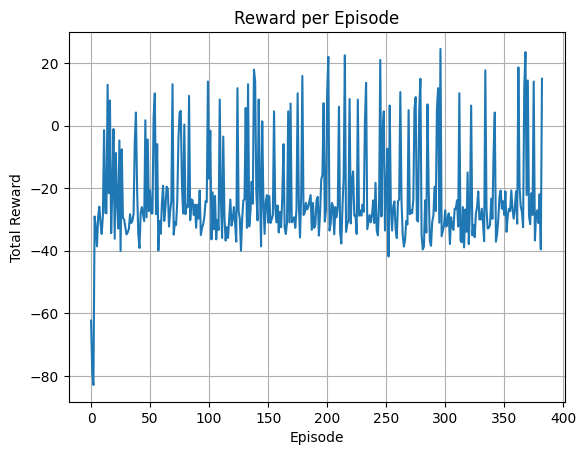

In [ ]:
# 📈 Plot results
plt.plot(all_rewards, )
plt.title("Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.grid()
plt.show()


In [ ]:
import os
import glob
import io
import base64
from IPython import display
from IPython.display import HTML
from gymnasium.wrappers import RecordVideo
from gymnasium import wrappers
from gym.wrappers.monitoring import video_recorder


In [ ]:
os.makedirs("video", exist_ok=True)


In [ ]:
def show_video(env_name):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")


def show_video_of_model(env_name, model, env, max_steps=1000):
    vid = video_recorder.VideoRecorder(env, path=f"video/{env_name}.mp4")
    state, _ = env.reset()

    done = False
    for _ in range(max_steps):

        state = preprocess(state).unsqueeze(0).to(device)
        vid.capture_frame()


        with torch.no_grad():
            action, _ = model(state)

        state, reward, terminated, truncated, _ = env.step(action.squeeze().detach().cpu().numpy())
        done = terminated or truncated
        if done:
            break
    vid.close()
    env.close()


In [ ]:
env_name = "CarRacing-v3"
env = gym.make(env_name, render_mode="rgb_array")
show_video_of_model(env_name=env_name, model=model, env=env)
show_video(env_name)


/usr/local/lib/python3.11/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(


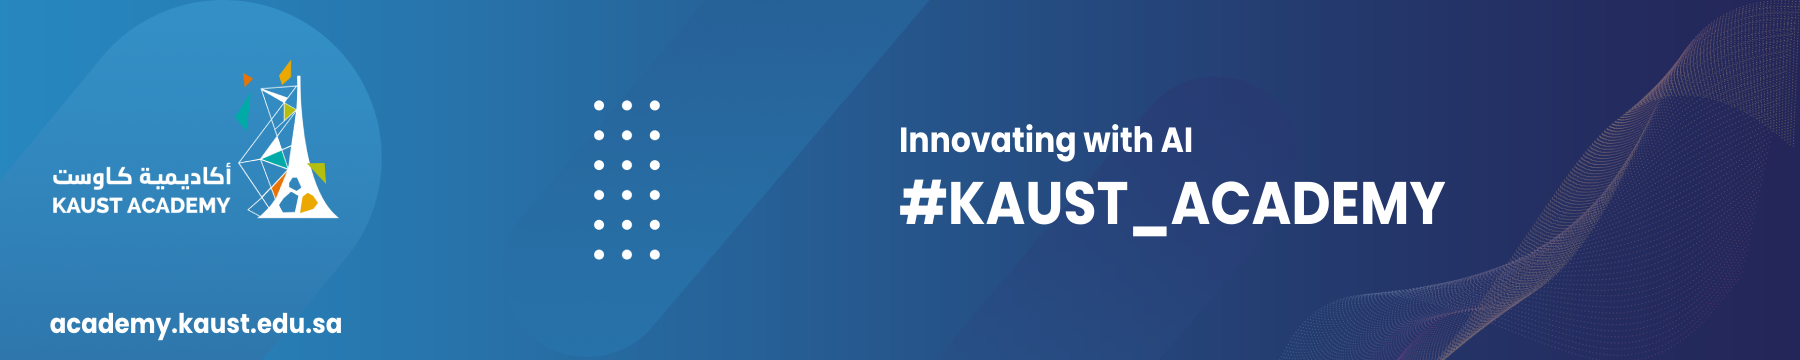

# Contributed by: Hassan Alsayhah